# Introduction to Data Science
## Homework 5

Student Name: Sanjay Subramanian

Student Netid: ss14383
***

### Part 1: Naive Bayes (5 Points)

1\. From your reading you know that the naive Bayes classifier works by calculating the conditional probabilities of each feature, $e_i$, occuring with each class $c$ and treating them independently. This results in the probability of a certain class occuring given a set of features, or a piece of evidence, $E$, as

$$P(c \mid E) = \frac{p(e_1 \mid c) \cdot p(e_2 \mid c) \cdot \cdot \cdot p(e_k \mid c) \cdot p(c)}{p(E)}.$$

The conditional probability of each piece of evidence occuring with a given class is given by

$$P(e_i \mid c) = \frac{\text{count}(e_i, c)}{\text{count}(c)}.$$

In the above equation $\text{count}(e_i, c)$ is the number of documents in a given class that contain feature $e_i$ and $\text{count}(c)$ is the number of documents that belong to class $c$. 

A common variation of the above is to use Laplace (sometimes called +1) smoothing. Recall the use of Laplace smoothing introduced toward the end of Chapter 3 in the section Probability Estimation. This is done in sklearn by setting `alpha=1` in the `BernoulliNB()` function (this is also the default behavior). The result of Laplace smoothing will slightly change the conditional probabilities,

$$P(e_i \mid c) = \frac{\text{count}(e_i, c) + 1}{\text{count}(c) + 2}.$$

In no more than **one paragraph**, describe why this is useful, and use the bias-variance tradeoff to justify its use. Try to think of a case when not using Laplace smoothing would result in "bad" models. Try to give an example. Be precise.

Laplace smoothing in this case introduces a small amount of bias to remove a large amount of variance that could arise with new or unique instances that would drive conditional probabilities to zero. This potential override of established probabilities given new instances can be avoided with these small (+1/+2) error additions. This additive smoothing can introduce varying levels of bias, but importantly allows for better classification by reducing extreme variance. An example in this case could be a set of negative words such as "horrible", "terrible", etc., which only show up in a sample of Negatively classified reviews. We cannot reasonably expect these words to never appear in Positive reviews ("This movie was NOT horrible!"), so we can update the conditional probabilities of these words given our Positive review set by implying a small number of instances of these words such that we introduce a minimal bias but drive variance down.

### Part 2: Text classification for sentiment analysis (20 Points)
For this part of the assignment, we are going to use a data set of movie ratings from IMDB.com. The data consists of the text of a movie review and a target variable which tells us whether the reviewer had a positive feeling towards the movie (equivalent to rating the movie between 7 and 10) or a negative feeling (rating the movie between 1 and 4). Neutral reactions are not included in the data.

The first column is the review text; the second is the text label 'P' for positive or 'N' for negative.

1 (1 Point) \. Load the data into a pandas `DataFrame()`.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
imdb = pd.read_csv('imdb.csv', header = 0)
imdb.head(5)

,Text,Class
0,'One of the first of the best musicals Anchors...,P
1,'Visually disjointed and full of itself the di...,N
2,'These type of movies about young teenagers st...,P
3,'I would rather of had my eyes gouged out with...,N
4,'The title says it all. Tail Gunner Joe was a ...,N


2 (1 Point)\. Code the target variable to be numeric: use the value `1` to represent 'P' and `0` to represent 'N'.

In [3]:
imdb.replace(['P', 'N'], [1, 0], inplace = True)
imdb.head(5)

,Text,Class
0,'One of the first of the best musicals Anchors...,1.0
1,'Visually disjointed and full of itself the di...,0.0
2,'These type of movies about young teenagers st...,1.0
3,'I would rather of had my eyes gouged out with...,0.0
4,'The title says it all. Tail Gunner Joe was a ...,0.0


3 (2 Points)\. Put all of the text into a data frame called `X` and the target variable in a data frame called `Y`. Make a train/test split where you give 75% of the data to training. Feel free to use any function from sklearn.

In [4]:
X = pd.DataFrame(imdb.drop('Class', axis = 1))
Y = pd.DataFrame(imdb.drop('Text', axis = 1))

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75, random_state=42)

4 (5 Points)\. Create a binary `CountVectorizer()` and a binary `TfidfVectorizer()`. Use the original single words as well as bigrams (in the same model). Also, use an "english" stop word list. Fit these to the training data to extract a vocabulary and then transform both the train and test data. Hint - look at the API documentation for both vectorizers to see what we mean by "binary."

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer(binary = True, stop_words = 'english', ngram_range = (1, 2))
vectorizer.fit(X_train['Text'])

tfidf_vectorizer = TfidfVectorizer(binary = True, stop_words = 'english', ngram_range = (1, 2))
tfidf_vectorizer.fit(X_train['Text'])

TfidfVectorizer(binary=True, ngram_range=(1, 2), stop_words='english')

In [7]:
X_train_count = vectorizer.transform(X_train['Text'])
X_test_count = vectorizer.transform(X_test['Text'])

X_train_tfidf = tfidf_vectorizer.transform(X_train['Text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['Text'])

5 (6 Points)\. Create `LogisticRegression()` and `BernoulliNB()` models. For all settings, keep the default values. In a single plot, show the AUC curve for both classifiers and both vectorizers defined above. In the legend, include the area under the ROC curve (AUC). Do not forget to label your axes. Your final plot will be a single window with 4 curves.

Which model do you think does a better job? Why? Explain in no more than a paragraph.

Extra credit (2 points): Do any of the options perform identically? If so, can you explain why?

In [8]:
# Run this so your plots show properly
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 6, 6

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

fprs, tprs, roc_labels, aucs = [], [], [], []
def modelselect(model, vec):
    if model == 'LR':
        model = LogisticRegression()
        if vec == 'count':
            model.fit(X_train_count, np.nan_to_num(Y_train['Class']))
            fpr, tpr, thresholds = metrics.roc_curve(np.nan_to_num(Y_test['Class']), model.predict_proba(X_test_count)[:,1])
            auc = metrics.auc(fpr, tpr)
            tprs.append(tpr)
            fprs.append(fpr)
            roc_labels.append("LR Count")
            aucs.append(auc)
        if vec == 'tfidf':
            model.fit(X_train_tfidf, np.nan_to_num(Y_train['Class']))
            fpr, tpr, thresholds = metrics.roc_curve(np.nan_to_num(Y_test['Class']), model.predict_proba(X_test_tfidf)[:,1])
            auc = metrics.auc(fpr, tpr)
            tprs.append(tpr)
            fprs.append(fpr)
            roc_labels.append("LR Tfidf")
            aucs.append(auc)
    if model == 'BN':
        model = BernoulliNB()
        if vec == 'count':
            model.fit(X_train_count, np.nan_to_num(Y_train['Class']))
            fpr, tpr, thresholds = metrics.roc_curve(np.nan_to_num(Y_test['Class']), model.predict_proba(X_test_count)[:,1])
            auc = metrics.auc(fpr, tpr)
            tprs.append(tpr)
            fprs.append(fpr)
            roc_labels.append("Bernoulli Count")
            aucs.append(auc)
        if vec == 'tfidf':
            model.fit(X_train_tfidf, np.nan_to_num(Y_train['Class']))
            fpr, tpr, thresholds = metrics.roc_curve(np.nan_to_num(Y_test['Class']), model.predict_proba(X_test_tfidf)[:,1])
            auc = metrics.auc(fpr, tpr)
            tprs.append(tpr)
            fprs.append(fpr)
            roc_labels.append("Bernoulli Tfidf")
            aucs.append(auc)
    return

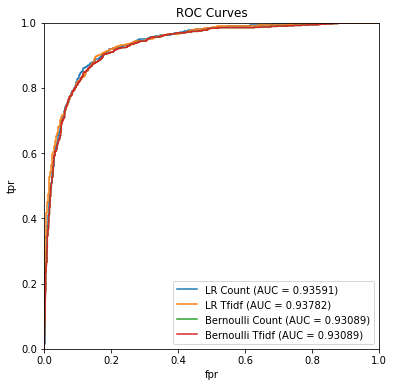

In [10]:
models, vecs = ['LR', 'BN'], ['count', 'tfidf']
for model in models:
    for vec in vecs:
        modelselect(model, vec)

for fpr, tpr, roc_label, auc in zip(fprs, tprs, roc_labels, aucs):
    plt.plot(fpr, tpr, label = roc_label + ' (AUC = %0.5f)' % auc)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC Curves")
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

In the ROC plot above, we can see that the LR Tfidf model seems to perform the best, while the two Bernoulli NB models output the same AUC values, which are lower in general than the LR AUC values. This may be attributed to the fact that the NB model works best when conditional independence holds. However, in movie reviews, this assumption may not be reasonable given the connection between certain words (i.e. the word "weapon" in text makes it more likely to see the words "action" or "explosion"). In terms of CountVectorization vs TfidfVectorization, merely counting instances may bias our predictions in favor of high-frequency words, whereas Tfidf weights frequencies across all documents such that less common words with a higher predictive value are represented accordingly.

In terms of why both Bernoulli NB models performed equivalently, this can be attributed to the fact that NB models classify occurrences rather than frequencies, meaning weighting of word counts is thrown out in favor of just instances. This neutralizes the difference between the Count and Tfidf methods and causes the models to be equivalent

5\. Use the model from question 4 that you think did the best job and predict the rating of the test data. Find 5 examples were labeled positive, but were incorrectly classified as negative. Print out the reviews below and include an explanation as to why you think it may have been incorrectly classified. You can pick any 5. They do not have to be at random.

In [11]:
tfidf_vectorizer = TfidfVectorizer(binary = True, stop_words = 'english', ngram_range = (1, 2))
tfidf_vectorizer.fit(X['Text'])
X_tfidf = tfidf_vectorizer.transform(X['Text'])

model = LogisticRegression()
model.fit(X_tfidf, np.nan_to_num(Y['Class']))

pred = model.predict(X_tfidf)
classifier = pd.DataFrame({'pred': pred, 'true': Y['Class']})

In [12]:
wrong = classifier[classifier['pred'] != classifier['true']].index.tolist()
imdb_wrong = imdb[imdb.index.isin(wrong)]
samp = imdb_wrong.sample(5)
samp

,Text,Class
7500,'Frownland is like one of those intensely emba...,1.0
6424,'I must say I thought I had seen it all. I am ...,1.0
4362,'Stupid Stupid Stupid. I think that Angelina J...,1.0
4134,'I just want to say that I am so glad somebody...,1.0
7243,'Was this based on a comic-book? A video-game?...,1.0


In [15]:
for i in samp.index:
    print(samp.loc[i, 'Text'])

'Frownland is like one of those intensely embarrassing situations where you end up laughing out loud at exactly the wrong time; and just at the moment you realize you shouldnt be laughing youve already reached the pinnacle of voice resoundness; and as you look around you at the ghostly white faces with their gaping wide-open mouths and glazen eyes you feel a piercing ache beginning in the pit of your stomach and suddenly rushing up your throat and... well you get the point. But for all its unpleasantness and punches in the face Frownland really is a remarkable piece of work that after viewing the inarticulate mess of a main character and all his pathetic troubles and mishaps makes you want to scratch your own eyes out and at the same time you feel sickenly sorry for him. It would have been a lot easier for me to simply walk out of Ronald Bronsteins film but for some insane reason I felt an unwavering determination to stay the course and experience all the grainy irritation the film has

The 5 randomly chosen reviews above were all classified as positive reviews initially and misclassified as negative reviews by the logistic regression Tfidf model. Many movie reviews can be amgibuous before delivering a verdict, and the more thorough reviews are usually sure to include both positives and negatives about the film, making classification less binary than would be ideal. With these traits in mind, we can look for specific trends and keywords/phrases that would most likely appear in negative reviews overall, and check for them in these five reviews.

In review 1, it is easy to pick out many negatively connoted words such as "embarrassing, wrong, ache, inarticulate mess, pathetic, irritation, etc. The review overall seems to be the result of an evocation of intense feelings (mostly negative) which served to make the movie a compelling watch and positive from a movie-going experience. This type of complexity is hard to categorize.

In review 2, we have tale of two halves, where the reviewer intensely criticizes the first half of the movie before briefly praising the second half, but included in that praise is a recommendation to watch the film. As in review 1, the concentration of negatively associated words throughout most of the review would have skewed this predictor negative.

Reviews 3, 4, and 5 actually seem like cases of misclassification by the original dataset. Review 3 provides an unambiguous diatribe of the movie in very few words, using key words such as "stupid, wasted, no stars". In review 4, the reviewer is very sarcastic and uses words like "bravo, thanks, kudos" in a disparaging manner, while other phrases such as "ridiculous farce, plain silly, atrocious actresses" reveal the true sentiment towards the film. Sarcasm and context/connotation is difficult to overcome when word denotations are quite binary in this model. In the long-winded review 5, a plot summary is provided and ridicules the movie while succinctly praising certain aspects. Overall, words/phrases such as "hilarious" (used in a negative connotation), "good", "mindless fun", and "excellently shot", which classified this review as positive, were outweighed in the LR Tfidf model by the plethora of negative words which capture the overall sentiment of the review.